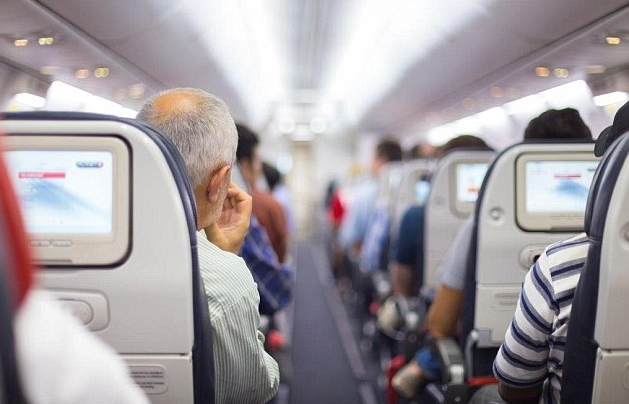

#  Passengers Satisfaction

# Table of Contents

- [Introduction](#intro) 
- [Data Collect and Cleaning](#dataCleaning)   
- [Exploratory Data Analysis](#eda)
    - [Univaraite Analisys](#uni)
    - [Bivariate Analisys](#bi)
    - [Multivariate Analisys](#multi)
- [Models](#models)
    - [Decision Tree](#dt)
    - [Logistic Regression](#lr)
    - [k-Nearest Neighbor](#kn)
    - [Random Forest](#randmForest)
    - [Other Ensemble Models](#ensemble)
    - [Summary](#summary)
- [Conclusion](#conclusion)

# Introduction<a name="intro"></a>
Continue with our analysis of the world of commercial airlines, let's say now that Southwest Airlines wants to know and predict the satisfaction of their clients.For that, they have given to me a data set that contains a number of surveys about the satisfaction of the airline's passengers. The aim is to predict the passenger satisfaction, if it will be "satisfied" or, "neutral or dissatisfied", and find out what are the most important features for the clients. Considering the target, we are in front of a binary classification problem.

The dataset is from https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Each survey has the following features:
*   **Gender**: Passenger's gender
*   **Customer type**: Passenger's type (Loyal customer, disloyal customer)
*   **Age**: Passenger's age
*   **Type of travel**: The purpose of the travel (Personal Travel, Business Travel)
*   **Class**: Passenger's class (Business, Eco, Eco Plus)
*   **Flight distance**: Distance of the flight
*   **Inflight wifi service**: Satisfaction (from 1 to 5) of the WIFI service during the flight
*   **Departure arrival time convenient**: Satisfaction (from 1 to 5) reladted with departure arrival time convenient
*   **Ease of online Booking**: Satisfaction (from 1 to 5) about the online booking service
*   **Gate location**: Satisfaction (from 1 to 5) related with the gate location
*   **Food and drink**: Satisfaction (from 1 to 5) about the food and dring
*   **Online boarding**: Satisfaction (from 1 to 5) related with the online boarding service
*   **Seat comfort**: Satisfaction (from 1 to 5) about how confortable is the seat
*   **Inflight entertainment**: Satisfaction (from 1 to 5) of the inflight entertainment
*   **On board service**: Satisfaction (from 1 to 5) about on board service
*   **Leg room service**: Satisfaction (from 1 to 5) for the leg room service
*   **Baggage handling**: Satisfaction (from 1 to 5) about rhe baggage handling
*   **Check in service**: Satisfaction (from 1 to 5) related the check in service
*   **Inflight service**: Satisfaction (from 1 to 5) about the inflight service
*   **Cleanliness**: (from 1 to 5) Satisfaction for the cleanliness
*   **Departure delay in minutes**: Departure delay (in minutes)
*   **Arrival delay in minutes**: Arrival delay (in minutes)

In [1]:
import numpy as np
import networkx as nx
import re
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import figure
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import calibration_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import os

import warnings
warnings.filterwarnings("ignore")

# show all columns
pd.set_option('display.max_columns', None)

os.system('pip install pyalluvial')
import pyalluvial.alluvial as alluvial

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## **Data Collect and Cleaning**<a name="dataCleaning"></a>

In [3]:
df_train.shape

(103904, 25)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

As we can see, we have some NaN in Arrival Delay in Minutes, about 310 rows.

In [5]:
df_train[df_train["Arrival Delay in Minutes"].isna()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,satisfied


In [6]:
df_train["Arrival Delay in Minutes"].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

We have few rows with NaN if we compare with the total of rows, so I'll fill the NaN with 0, as it is the mode value.

In [7]:
df_train["Arrival Delay in Minutes"].fillna(0, inplace=True)

Let's check of there are duplicates records.

In [8]:
df_train[df_train.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


Categorical Features:
*   Gender
*   Customer Type
*   Type of Travel
*   Class
*   Inflight wifi service
*   Departure/Arrival time convenient
*   Ease of Online booking
*   Gate location
*   Food and drink
*   Online boarding
*   Seat comfort
*   Inflight entertainment
*   On-board service
*   Leg room service
*   Baggage handling
*   Checkin service
*   Inflight service
*   Cleanliness
*   Satisfaction

Numerical Features:
*   Unnamed: 0
*   id
*   Age
*   Flight Distance
*   Departure Delay in Minutes
*   Arrival Delay in Minutes

The data set has 25 features and 103904 rows. We have a good size of data, without NaN and duplicates. Most of the features are categorical (ordinal and nominal). Our target is **satisfaction**

Let's see the test file.

In [9]:
df_test = pd.read_csv("test.csv", sep=",",skipinitialspace=True)
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:
df_test.shape

(25976, 25)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Here we have the same situation than with the train set, there are NaN in Arrival Delay in Minutes, but here we have just 83 rows. I will do the same by filling the NaN with 0.

In [12]:
df_test["Arrival Delay in Minutes"].value_counts()

0.0      14594
1.0        536
2.0        523
3.0        490
4.0        466
         ...  
307.0        1
285.0        1
347.0        1
795.0        1
288.0        1
Name: Arrival Delay in Minutes, Length: 320, dtype: int64

In [13]:
df_test["Arrival Delay in Minutes"].fillna(0, inplace=True)

Checking duplicates

In [14]:
df_test[df_test.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


Here we have 2 datasets, I will merge both data sets, and the for the model training I will split it in train and test data.

In [15]:
df_final = pd.concat([df_train, df_test], axis=0)
df_final.shape

(129880, 25)

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

We have now 129880 rows in total.

I rename the columns in order to have all of them with the same format.

In [17]:
df_final.rename(columns={
    'Gender': 'gender', 
    'Customer Type': 'customer_type',
    'Age': 'age',
    'Type of Travel': 'type_of_travel',
    'Class': 'class',
    'Flight Distance': 'flight_distance',
    'Inflight wifi service': 'inflight_wifi_service',
    'Departure/Arrival time convenient': 'departure_arrival_time_convenient',
    'Ease of Online booking': 'ease_of_online_booking',
    'Gate location': 'gate_location',
    'Food and drink': 'food_and_drink',
    'Online boarding': 'online_boarding',
    'Seat comfort': 'seat_comfort',
    'Inflight entertainment': 'inflight_entertainment',
    'On-board service': 'on_board_service',
    'Leg room service': 'leg_room_service',
    'Baggage handling': 'baggage_handling',
    'Checkin service': 'checkin_service',
    'Inflight service': 'inflight_service',
    'Cleanliness': 'cleanliness',
    'Departure Delay in Minutes': 'departure_delay_in_minutes',
    'Arrival Delay in Minutes': 'arrival_delay_in_minutes'
    }, inplace=True)
df_final.columns

Index(['Unnamed: 0', 'id', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

## **Exploratory Data Analysis**<a name="eda"></a>

Before starting the Exploratory data analysis, I replace the values of our target for the models as well as to know the correlation with the other features.

In this part I will try to asnwer some questions:
- Most of the passengers are Loyal or Disloyal?
- Which class do most of the passengers travel?
- How are the airline's services qualified? Depends on the class?
- Most of the passengers are satisfied?
- Which service has more impact in the passenger satisfaction?

In [18]:
df_final['satisfaction'].replace('satisfied', 1, inplace=True)
df_final['satisfaction'].replace('neutral or dissatisfied',0, inplace=True)

In [19]:
df_final.describe()

,Unnamed: 0,id,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465,0.434463
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353,0.495688
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


We can see that the average of the passengers is 40 years old, and it seems that there is not outliners. Most of the ordinal categorical features have an average of 3.3, except the features **inflight_wifi_service**, **ease_of_online_booking**, **gate_location** that have less than 3 points. About **departure_delay_in_minutes** and **arrival_delay_in_minutes** we can see some outliners in max values.

Let's do a more detailed analysis.

### **Univariate Analysis**<a name="uni"></a>

Let's see the behavior of some features

#### **Gender**

In [20]:
df_final["gender"].value_counts()

Female    65899
Male      63981
Name: gender, dtype: int64

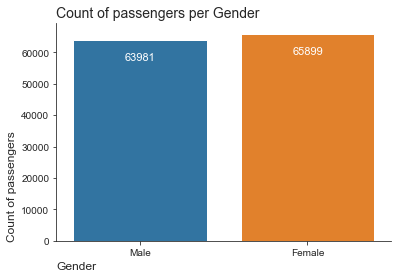

In [21]:
sns.set_style("ticks")

gender_plot = sns.countplot(x="gender", data=df_final)
for rect in gender_plot.patches:
    gender_plot.text(rect.get_x() + rect.get_width() / 2, rect.get_height() - (rect.get_height() * 0.1), 
                     rect.get_height(), horizontalalignment='center', fontsize=11, color="white")

gender_plot.set_title('Count of passengers per Gender', fontsize = 14, loc="left")
gender_plot.set_xlabel('Gender', fontsize = 12, loc="left")
gender_plot.set_ylabel('Count of passengers', fontsize = 12, loc="bottom")
sns.despine()

The feature **gender** is most balanced, we have the same number of males and females.

#### **Customer Type**

In [22]:
df_final["customer_type"].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64

In [23]:
df_final['customer_type'].replace('disloyal Customer', 'Disloyal Customer', inplace=True)

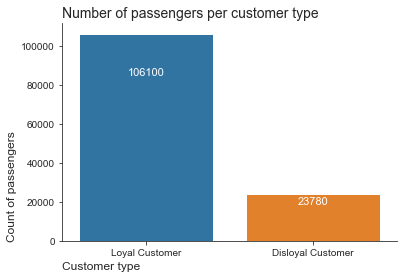

In [24]:
customer_type_plot = sns.countplot(x="customer_type", data=df_final)

for rect in customer_type_plot.patches:
    customer_type_plot.text (rect.get_x() + rect.get_width() / 2, rect.get_height() - (rect.get_height() * 0.20), 
                             rect.get_height(), horizontalalignment = 'center', fontsize = 11, color="white")

customer_type_plot.set_title('Number of passengers per customer type', fontsize = 14, loc="left")
customer_type_plot.set_xlabel('Customer type', fontsize = 12, loc="left")
customer_type_plot.set_ylabel('Count of passengers', fontsize = 12, loc="bottom")
sns.despine()

Most of the passengers are **Loyal Customer**, with 106100 passengers, so most of the passengers are affiliated to the company. Here we have the asnwer of our first question.

#### **Type of Travel**

In [25]:
df_final["type_of_travel"].value_counts()

Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64

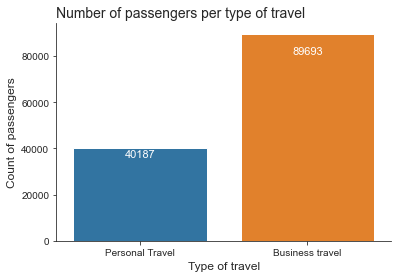

In [26]:
type_of_travel_plot = sns.countplot(x="type_of_travel", data=df_final)

for rect in type_of_travel_plot.patches:
    type_of_travel_plot.text (rect.get_x() + rect.get_width() / 2, rect.get_height() - (rect.get_height() * 0.10),
                              rect.get_height(), horizontalalignment='center', fontsize=11, color="white")

type_of_travel_plot.set_title('Number of passengers per type of travel', fontsize=14, loc='left' )
type_of_travel_plot.set_xlabel('Type of travel', fontsize = 12)
type_of_travel_plot.set_ylabel('Count of passengers', fontsize = 12)
sns.despine()

As we can see, most of the passenger **travel for business**, with 89693 passengers. This can explain the number of Loyal Customers, seems that most of the loyal customers travel for business.

#### **Class**

In [27]:
df_final["class"].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: class, dtype: int64

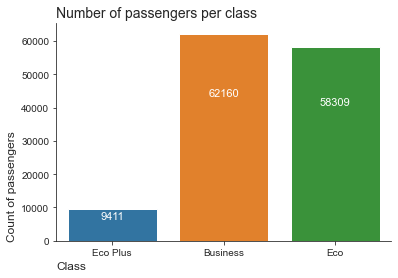

In [28]:
class_plot = sns.countplot(x="class", data=df_final)

for rect in class_plot.patches:
    class_plot.text (rect.get_x() + rect.get_width() / 2, rect.get_height() - (rect.get_height() * 0.3), 
                     rect.get_height(), horizontalalignment = 'center', fontsize = 11, color="white")

class_plot.set_title('Number of passengers per class', fontsize = 14, loc='left')
class_plot.set_xlabel('Class', fontsize = 12, loc="left")
class_plot.set_ylabel('Count of passengers', fontsize = 12, loc="bottom")
sns.despine()

Most of the passengers travel in Business and Eco classes, answering our second question.

#### **Services Reviews**

Let's exmplore now the different services with their reviews all together.

In [29]:
df_categorial_ordinal_features = pd.DataFrame()
df_cat_ordinal = ["inflight_wifi_service",
"departure_arrival_time_convenient",
"ease_of_online_booking",
"gate_location",
"food_and_drink",
"online_boarding",
"seat_comfort",
"inflight_entertainment",
"on_board_service",
"leg_room_service",
"baggage_handling",
"checkin_service",
"inflight_service",
"cleanliness"]


for column in df_cat_ordinal:
    value_counts = df_final[column].value_counts().sort_index()
    total_count = value_counts.sum()
    value_percentages = (value_counts / len(df_final)) * 100
    df_categorial_ordinal_features[column] = value_percentages
    
df_categorial_ordinal_features = df_categorial_ordinal_features.fillna(0)
df_categorial_ordinal_features = df_categorial_ordinal_features.T.reset_index().rename(columns={"index": "service"})
df_categorial_ordinal_features

custom_service_names = {
 'inflight_wifi_service':'Inflight wifi service',
 'departure_arrival_time_convenient':'Departure arrival time convenient',
 'ease_of_online_booking':'Ease of online booking',
 'gate_location':'Gate location',
 'food_and_drink':'Food and drink',
 'online_boarding':'Online boarding',
 'seat_comfort':'Seat comfort',
 'inflight_entertainment':'Inflight entertainment',
 'on_board_service':'On board service',
 'leg_room_service':'Leg room service',
 'baggage_handling':'Baggage handling',
 'checkin_service':'Checkin service',
 'inflight_service':'Inflight service',
 'cleanliness':'Cleanliness'
}

df_categorial_ordinal_features['service'] = df_categorial_ordinal_features['service'].map(custom_service_names)

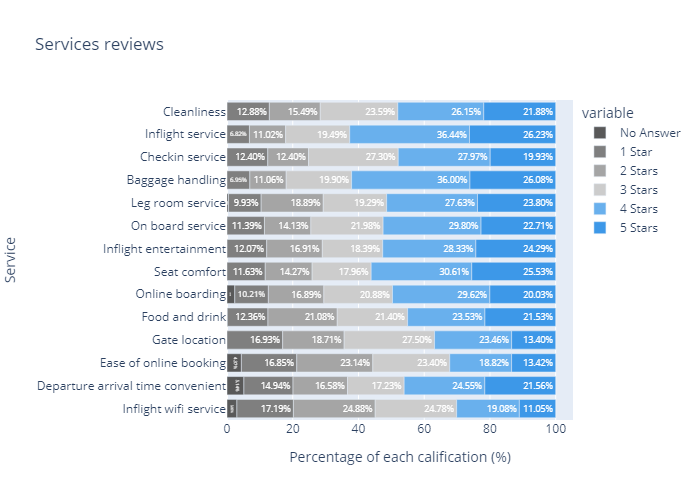

In [30]:
colors = ['#595959', '#7f7f7f', '#a5a5a5', '#cccccc', '#69b0ed', "#3d98e8"]
fig = px.bar(df_categorial_ordinal_features, x=[0,1,2,3,4,5], y='service', 
             title='Services reviews',
              orientation='h', color_discrete_sequence=colors
            )
legend_labels = ['No Answer', '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
for i, label in enumerate(legend_labels):
    fig.data[i].name = label
fig.update_traces(texttemplate='%{x:.2f}%', textposition='inside',  textfont_color="white")
fig.update_xaxes(title_text='Percentage of each calification (%)')
fig.update_yaxes(title_text='Service')
fig.show("png")

In this plot we can see the all the services and their scores. In blue we have the high scores (4 and 5 stars) and in gray the scores with low satisfaction.

We can see services with more of 50% of good satisfaction, such us Inflight Service, Baggage Handling, Seat Confort.

Then we have services with moderate satisfaction, like Leg Room Service, On Board Service, Inflight Entertainment, Online Boarding, Checkin Service, Departure Arrival Time Convenient and Cleanliness.

Lastly, we have poor satisfation in Food and drink, Ease of online booking, Gate location and Inflight wifi service.

#### Flight Distance

In [31]:
df_final["flight_distance"].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: flight_distance, dtype: float64

In [32]:
df_final["flight_distance"].mode()

0    337
Name: flight_distance, dtype: int64

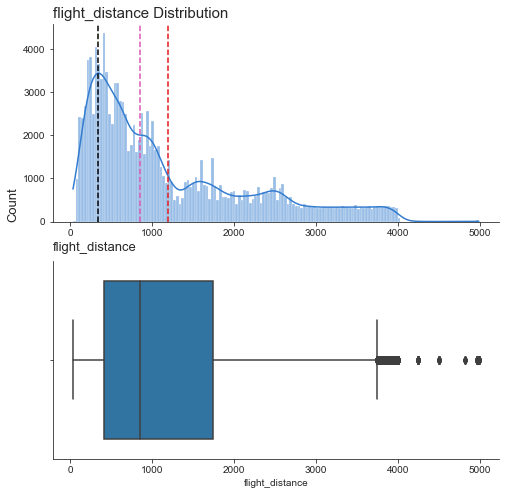

In [33]:
def print_numerical_distribution(df, feature):
    fix, ax = plt.subplots(2, 1, figsize = (8, 8))
    asd = sns.histplot(data=df, x=feature, color="#337CCF", kde=True, ax = ax[0], bins=150)
    ax[0].axvline(x = df[feature].mean(), color="#e31a1c", ls="--")
    ax[0].axvline(x = df[feature].mode()[0], color="black", ls="--")
    ax[0].axvline(x = df[feature].median(), color="#db57b2", ls="--")
    sns.boxplot(x=df[feature], ax = ax[1])
    ax[1].set_xlabel(feature)
    asd.set_title(feature + ' Distribution', fontsize = 15, loc="left")
    asd.set_ylabel('Count', fontsize = 13, loc="bottom")
    asd.set_xlabel(feature, fontsize = 13, loc="left")
    sns.despine()

print_numerical_distribution(df_final.reset_index(), "flight_distance")

In black we can see the mode, in pink the median and the with red the mean.

The most frequent distance is 337, and the flights of the survey have an average of distance of 1190.

The median is 844, and most of the distances are between 414 and 1744, the distance are well dispersed. And the maximum distance is 4983.

#### **Arrival Delay In Minutes**

In [34]:
df_final["arrival_delay_in_minutes"].describe()

count    129880.000000
mean         15.045465
std          38.416353
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrival_delay_in_minutes, dtype: float64

In [35]:
df_final["arrival_delay_in_minutes"].mode()

0    0.0
Name: arrival_delay_in_minutes, dtype: float64

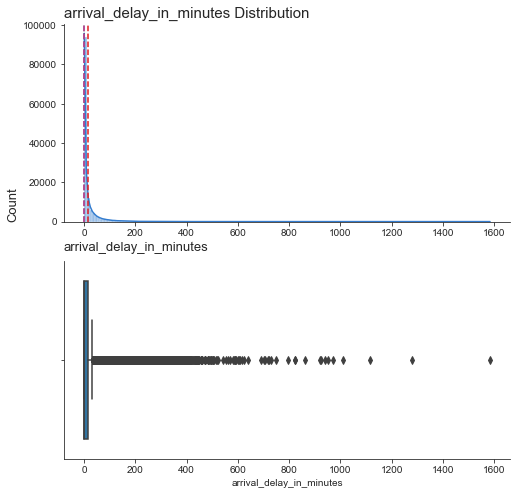

In [36]:
print_numerical_distribution(df_final.reset_index(), "arrival_delay_in_minutes")

50% of the flights of the survey have 0 minutes of arrival delay. Its distribution is very narrow, with many outliers where the maximum delay is 1584 minutes.

#### Departure Delay in Minutes

In [37]:
df_final["departure_delay_in_minutes"].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: departure_delay_in_minutes, dtype: float64

In [38]:
df_final["departure_delay_in_minutes"].mode()

0    0
Name: departure_delay_in_minutes, dtype: int64

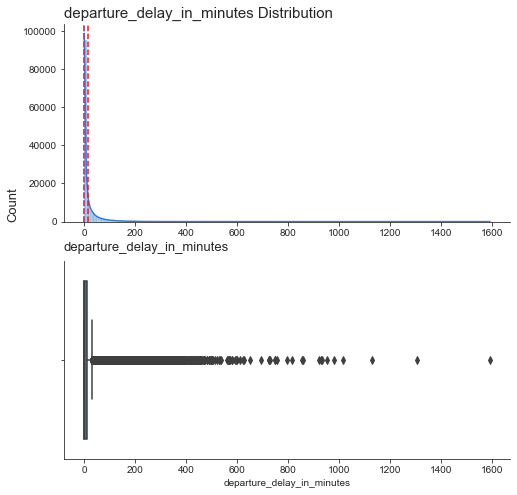

In [39]:
print_numerical_distribution(df_final.reset_index(), "departure_delay_in_minutes")

Here we have the same situacion than Arrival delay, 50% of the flights of the survey have 0 minutes of departure delay and it is also the most frequent delay. Its distribution is very narrow, with many outliers where the maximum delay is 1592 minutes.

#### **Satisfaction**

In [40]:
df_final["satisfaction"].value_counts()

0    73452
1    56428
Name: satisfaction, dtype: int64

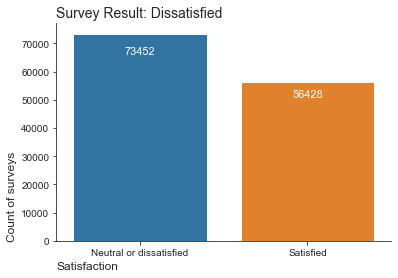

In [41]:
type_of_travel_plot = sns.countplot(x="satisfaction", data=df_final)

for rect in type_of_travel_plot.patches:
    type_of_travel_plot.text (rect.get_x() + rect.get_width() / 2, rect.get_height() - (rect.get_height() * 0.10),
                              rect.get_height(), horizontalalignment='center', fontsize=11, color="white")

type_of_travel_plot.set_title('Survey Result: Dissatisfied', fontsize=14, loc='left' )
type_of_travel_plot.set_xlabel('Satisfaction', fontsize = 12, loc="left")
type_of_travel_plot.set_ylabel('Count of surveys', fontsize = 12, loc="bottom")
new_labels = ['Neutral or dissatisfied', 'Satisfied']
type_of_travel_plot.set_xticklabels(new_labels)
sns.despine()

We can observe that our target is not balanced, we have a difference of 17024 registers, where the most of the passengers are Neutral or dissatisfied with the airline.

#### **Conclusion**

After the Univariate analysis, we can see that in some cases (in our target for example) the data is no balanced. However, I will continue the analysis, but in the future we can generate or remove some data in order to gain that balance.

We have seen also that most of the passengers are loyal, travel for business and in business or eco class.

### **Bivariate Analysis**<a name="bi"></a>

In [42]:
df_final.corr()

,Unnamed: 0,id,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
Unnamed: 0,1.000000,0.002199,0.000109,0.001160,-0.001320,0.002141,0.001388,0.003799,-0.004171,-0.000912,-0.001724,0.000485,0.000170,0.003046,-0.000626,-0.004747,-0.001990,-0.001083,0.002358,0.002099,-0.005840
id,0.002199,1.000000,0.020322,0.095504,-0.023096,-0.002192,0.013400,-0.000113,-0.000510,0.055538,0.052164,0.001620,0.055502,0.044088,0.074569,0.079325,0.078793,0.024048,-0.017643,-0.035405,0.013182
age,0.000109,0.020322,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011206,0.134091
flight_distance,0.001160,0.095504,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001973,0.298085
inflight_wifi_service,-0.001320,-0.023096,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017762,0.283460
departure_arrival_time_convenient,0.002141,-0.002192,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.001005,-0.054270
ease_of_online_booking,0.001388,0.013400,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007046,0.168877
gate_location,0.003799,-0.000113,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005643,-0.002793
food_and_drink,-0.004171,-0.000510,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031685,0.211340
online_boarding,-0.000912,0.055538,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022663,0.501749


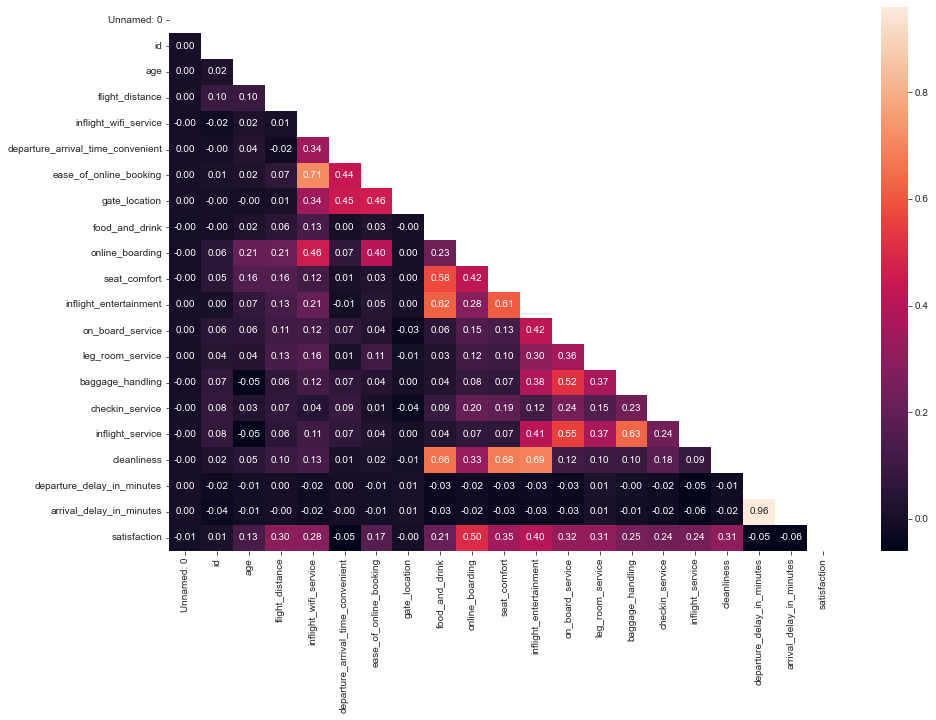

In [43]:
plt.figure(figsize=(15,10))
matrix = np.triu(df_final.corr())
sns.heatmap(df_final.corr(), annot=True, fmt=".2f", mask=matrix)
plt.show()

If we select the features with a correlation more than 0.35 we have:
* **online_boarding**: 0.50
* **seat_comfort**: 0.35
* **inflight_entertainment**: 0.40

Most of these features have around 50% of the surveys 4 or 5 stars, except seat comfort that have a bit more.

As the correlation can only be applicable to numerical features, the categoricals are not shown. Therefore, I will create dummies columns for each nominal categorical column and We will see their correlation with out target.

In [44]:
df_final_corr = df_final.copy()[["flight_distance", "online_boarding", "seat_comfort", "inflight_entertainment", 
                                 "on_board_service", "leg_room_service","cleanliness", "class", "gender", "type_of_travel",
                                 "customer_type", "satisfaction"]]
df_dumm  = pd.get_dummies(df_final_corr, prefix=['class'], columns=['class'])
df_dumm  = pd.get_dummies(df_dumm, prefix=['gender'], columns=['gender'])
df_dumm  = pd.get_dummies(df_dumm, prefix=['type_of_travel'], columns=['type_of_travel'])
df_dumm  = pd.get_dummies(df_dumm, prefix=['customer_type'], columns=['customer_type'])

Let's see the correlations

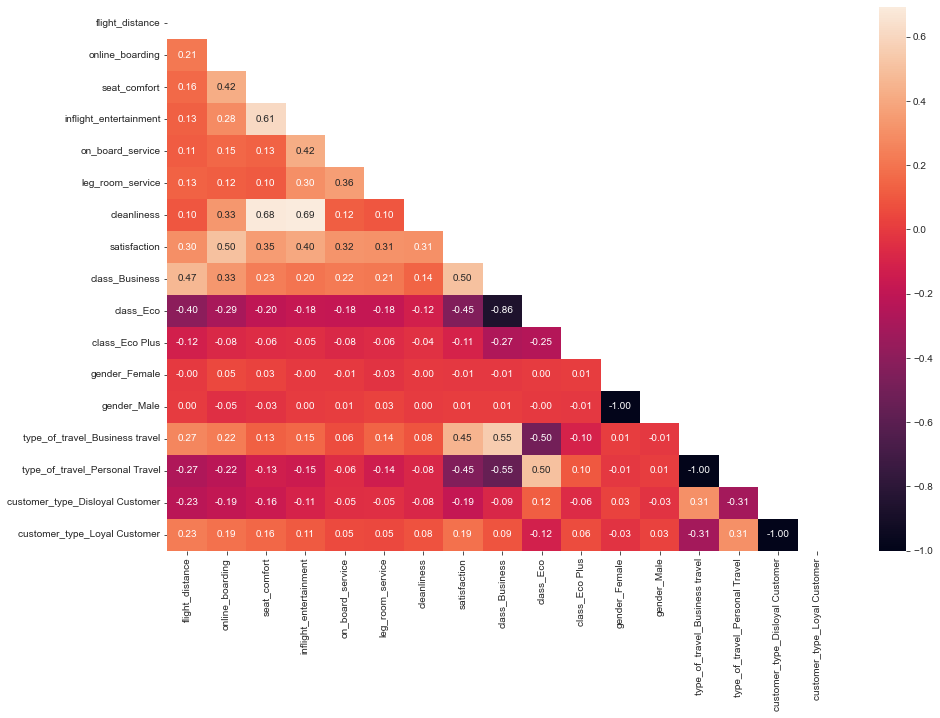

In [45]:
plt.figure(figsize=(15,10))
matrix = np.triu(df_dumm.corr())
sns.heatmap(df_dumm.corr(), annot=True, fmt=".2f", mask=matrix)
plt.show()

Now we can see new correlations:
 *   Negative with **type of travel** when it is Personal travel, of -0.45.
 *   Positive with **type of travel** when it is Business travel, of 0.45.
 *   Negative with **class** when it is Eco travel, of -0.45.
 *   Positive with **class** when it is Business, of 0.50.

Let's see now if we get the same situation by exploring the mutual information.

In [46]:
X = df_final.copy()
y = X.pop("satisfaction")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

online_boarding     0.213740
class               0.141918
seat_comfort        0.081354
on_board_service    0.062425
baggage_handling    0.049318
checkin_service     0.035485
gate_location       0.016710
gender              0.006057
Name: MI Scores, dtype: float64

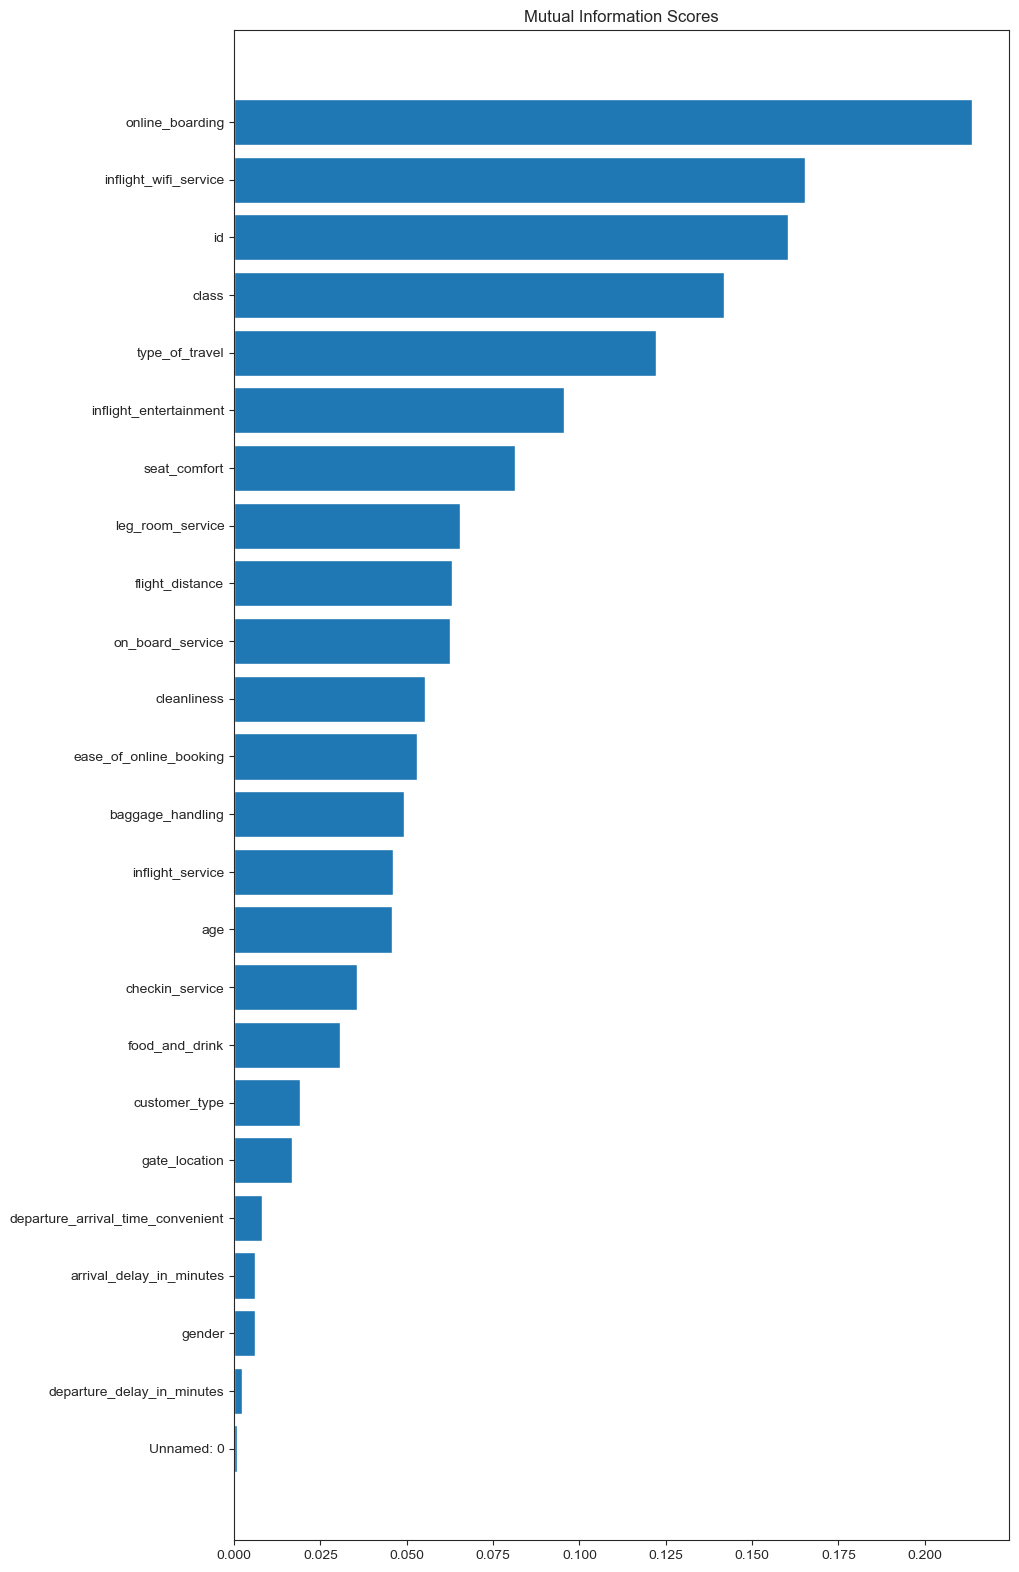

In [47]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(10, 20))
plot_mi_scores(mi_scores)

We achieved to similar situation than correlation.

So, based on that, I will focus now just on the features **Class**, **Type of travel**, **Inflight entertainment**, **Online boarding**, **Seat confort** and **Inflight wifi service**.

If we return to the plot of the services reviews, we can remember that **Inflight entertainment** and **Online boarding** have around the 50% of the reviews with 4 and 5 stars. **Seat Confort** has most of the 50% with 4 and 5 stars, and **Inflight wifi service** has poor score (just 30% with 4 and 5 stars).

Let's explore now the relation among them.

#### **Class**  

Let's start by analyzing the class with the other features.

##### **Class and satisfaction**  

In [48]:
pd.crosstab(df_final["class"], df_final["satisfaction"], margins=True, normalize=True, margins_name="Total")

satisfaction,0,1,Total
class,,,
Business,0.146243,0.332353,0.478596
Eco,0.364690,0.084255,0.448945
Eco Plus,0.054604,0.017855,0.072459
Total,0.565537,0.434463,1.000000


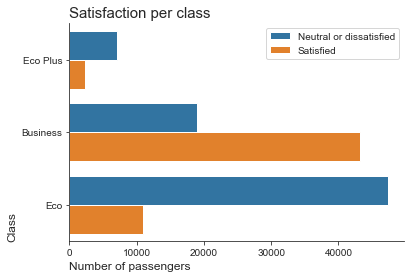

In [49]:
class_satisfaction_plot = sns.countplot(y="class", hue="satisfaction", data=df_final, orient ="b")
class_satisfaction_plot.set_title('Satisfaction per class', fontsize=15, loc="left")
class_satisfaction_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
class_satisfaction_plot.set_ylabel('Class', fontsize=12, loc="bottom")
custom_legend_labels = ['Neutral or dissatisfied', 'Satisfied']
class_satisfaction_plot.legend(custom_legend_labels)
sns.despine()

As we can see in the plot and the cross tab, most of the data are concentrated in the classes Business and Eco (as we saw in the univariate analysis). In case of Business, most of the passengers have a positive satisfaction, and in case of Eco the satisfaction is negative. So we can confirm the positive correlation in case of Business and negative correlation in case of Eco class.

##### **Class and seat comfort**  

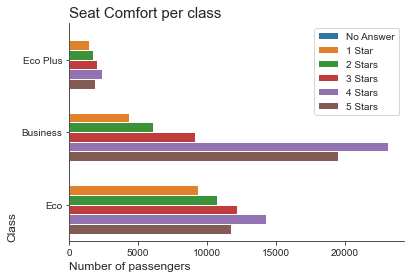

In [50]:
class_seat_comfort_plot = sns.countplot(y="class", hue="seat_comfort", data=df_final, orient ="b")
class_seat_comfort_plot.set_title('Seat Comfort per class', fontsize=15, loc="left")
class_seat_comfort_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
class_seat_comfort_plot.set_ylabel('Class', fontsize=12, loc="bottom")
custom_legend_labels = ['No Answer', '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
class_seat_comfort_plot.legend(custom_legend_labels)
sns.despine()

In all the classes the the most rated are 4 and 5 stars, there is no difference among the classes.

##### **Class and online boarding**  

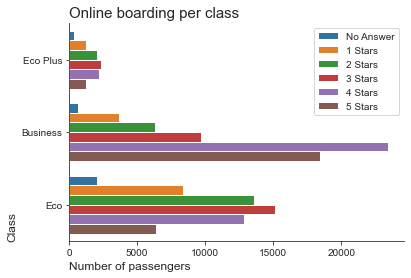

In [51]:
class_online_boarding_plot = sns.countplot(y="class", hue="online_boarding", data=df_final, orient ="b")
class_online_boarding_plot.set_title('Online boarding per class', fontsize=15, loc="left")
class_online_boarding_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
class_online_boarding_plot.set_ylabel('Class', fontsize=12, loc="bottom")
custom_legend_labels = ['No Answer', '1 Stars', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
class_online_boarding_plot.legend(custom_legend_labels)
sns.despine()

We can see that in case of Business class, Online boarding has mostly 4 stars and then 5 stars. But in case of Eco class, this service has 2 or 3 stars. Seems that there is a difference in the service based on the class.

##### **Class and inflight wifi service**  

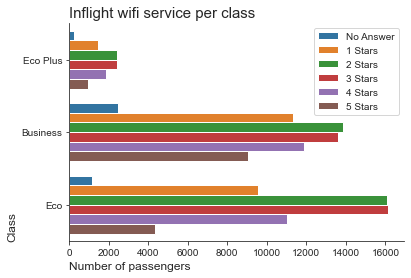

In [52]:
class_inflight_wifi_service_plot = sns.countplot(y="class", hue="inflight_wifi_service", data=df_final, orient ="b")
class_inflight_wifi_service_plot.set_title('Inflight wifi service per class', fontsize=15, loc="left")
class_inflight_wifi_service_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
class_inflight_wifi_service_plot.set_ylabel('Class', fontsize=12, loc="bottom")
custom_legend_labels = ['No Answer', '1 Stars', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
class_inflight_wifi_service_plot.legend(custom_legend_labels)
sns.despine()

In relation with Inflight wifi service, both classes have 2 and 3 stars as most rated. From the service satisfaction plot we can see that this services has poor calification.

##### **Class and inflight entertainment**  

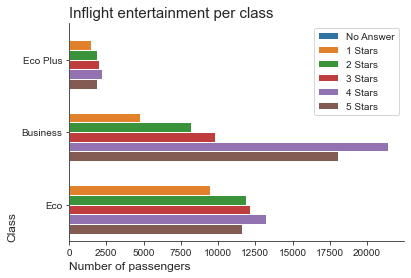

In [53]:
class_inflight_entertainment_plot = sns.countplot(y="class", hue="inflight_entertainment", data=df_final, orient ="b")
class_inflight_entertainment_plot.set_title('Inflight entertainment per class', fontsize=15, loc="left")
class_inflight_entertainment_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
class_inflight_entertainment_plot.set_ylabel('Class', fontsize=12, loc="bottom")
custom_legend_labels = ['No Answer', '1 Stars', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
class_inflight_entertainment_plot.legend(custom_legend_labels)
sns.despine()

In this case, all the classes the the most rated are 4 and 5 stars, there are no difference among the classes.

#### **Type of Travel**

##### **Type of travel and satisfaction**  

In [54]:
pd.crosstab(df_final["type_of_travel"], df_final["satisfaction"], margins=True, normalize=True, margins_name="Total")

satisfaction,0,1,Total
type_of_travel,,,
Business travel,0.287473,0.403111,0.690584
Personal Travel,0.278064,0.031352,0.309416
Total,0.565537,0.434463,1.000000


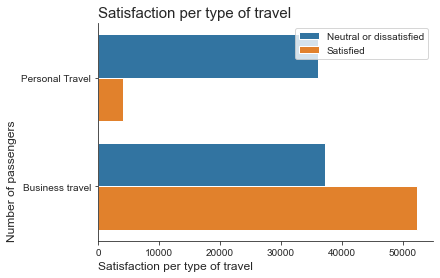

In [55]:
type_travel_satisfaction_plot = sns.countplot(y="type_of_travel", hue="satisfaction", data=df_final, orient ="b")
type_travel_satisfaction_plot.set_title('Satisfaction per type of travel', fontsize=15, loc="left")
type_travel_satisfaction_plot.set_xlabel('Satisfaction per type of travel', fontsize=12, loc="left")
type_travel_satisfaction_plot.set_ylabel('Number of passengers', fontsize=12, loc="bottom")
custom_legend_labels = ['Neutral or dissatisfied', 'Satisfied']
type_travel_satisfaction_plot.legend(custom_legend_labels)
sns.despine()

Here we have a similiar situation than in **Class**. In case of Business Travel, it is most probably that the passengers would be satisfied (positive correlation), and in case of Personal Travel the passenger would be unsatisfied (negative correlation). However, in Business Travel we can see many cases of passengers unsatisfied also.

##### **Type of travel and seat comfort**  

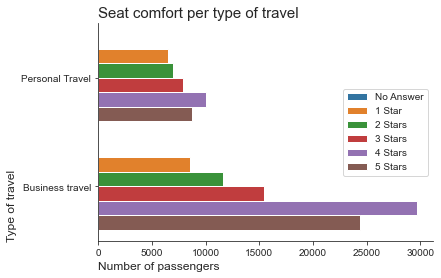

In [56]:
type_of_travel_seat_comfort_plot = sns.countplot(y="type_of_travel", hue="seat_comfort", data=df_final, orient ="b")
type_of_travel_seat_comfort_plot.set_title('Seat comfort per type of travel', fontsize=15, loc="left")
type_of_travel_seat_comfort_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
type_of_travel_seat_comfort_plot.set_ylabel('Type of travel', fontsize=12, loc="bottom")
custom_legend_labels = ['No Answer', '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
type_of_travel_seat_comfort_plot.legend(custom_legend_labels)
sns.despine()

In case of Seat comfort, both type of travels have 4 and 5 stars as most rated. No difference between in the seat comfort. 

##### **Type of travel and online boarding**  

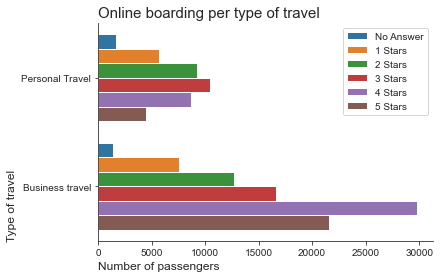

In [57]:
type_of_travel_online_boarding_plot = sns.countplot(y="type_of_travel", hue="online_boarding", data=df_final, orient ="b")
type_of_travel_online_boarding_plot.set_title('Online boarding per type of travel', fontsize=15, loc="left")
type_of_travel_online_boarding_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
type_of_travel_online_boarding_plot.set_ylabel('Type of travel', fontsize=12, loc="bottom")
custom_legend_labels = ['No Answer', '1 Stars', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
type_of_travel_online_boarding_plot.legend(custom_legend_labels)
sns.despine()

In this case, we have the same situation than in **Class**, for a Business travel the most rated are 4 and 5 stars. Instead, for a Personal travel the most rated is 2 and 3 stars.

##### **Type of travel and inflight wifi service**  

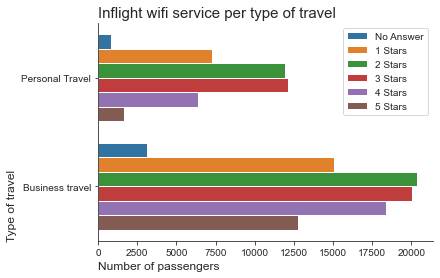

In [58]:
type_of_travel_inflight_wifi_service_plot = sns.countplot(y="type_of_travel", hue="inflight_wifi_service", 
                                                          data=df_final, orient ="b")
type_of_travel_inflight_wifi_service_plot.set_title('Inflight wifi service per type of travel', fontsize=15, loc="left")
type_of_travel_inflight_wifi_service_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
type_of_travel_inflight_wifi_service_plot.set_ylabel('Type of travel', fontsize=12, loc="bottom")
custom_legend_labels = ['No Answer', '1 Stars', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
type_of_travel_inflight_wifi_service_plot.legend(custom_legend_labels)
sns.despine()

There is not difference between the travel type for the **inflight wifi service**, both have 2 and 3 stars as most rated.

##### **Type of travel and inflight entertainment** 

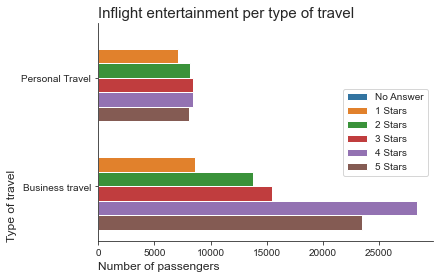

In [59]:
type_of_travel_inflight_entertainment_plot = sns.countplot(y="type_of_travel", hue="inflight_entertainment", 
                                                           data=df_final, orient ="b")
type_of_travel_inflight_entertainment_plot.set_title('Inflight entertainment per type of travel', fontsize=15, loc="left")
type_of_travel_inflight_entertainment_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
type_of_travel_inflight_entertainment_plot.set_ylabel('Type of travel', fontsize=12, loc="bottom")
custom_legend_labels = ['No Answer', '1 Stars', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
type_of_travel_inflight_entertainment_plot.legend(custom_legend_labels)
sns.despine()

We can see that there is a difference in **Inflight entertainment** between Personal and Bussiness travel.

##### **Type of travel and class** 

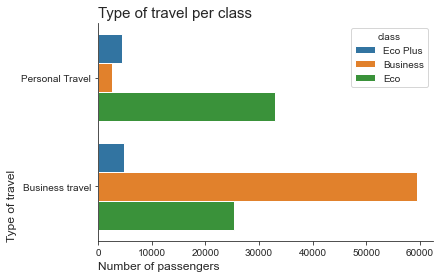

In [60]:
type_of_travel_class_plot = sns.countplot(y="type_of_travel", hue="class", data=df_final, orient ="b")
type_of_travel_class_plot.set_title('Type of travel per class', fontsize=15, loc="left")
type_of_travel_class_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
type_of_travel_class_plot.set_ylabel('Type of travel', fontsize=12, loc="bottom")
sns.despine()

We can observe that in case of Personal travel, most of the passengers travel in Eco class, and that in case of Business travel most of the passengers travel in Business class.

#### **Inflight Entertainment**

##### **Inflight Entertainment and satisfaction** 

In [61]:
pd.crosstab(df_final["inflight_entertainment"], df_final["satisfaction"], margins=True, normalize=True, 
            margins_name="Total")

satisfaction,0,1,Total
inflight_entertainment,,,
0,0.000139,0.000000,0.000139
1,0.103557,0.017131,0.120688
2,0.133169,0.035972,0.169141
3,0.133662,0.050231,0.183893
4,0.110156,0.173114,0.283269
5,0.084855,0.158015,0.242870
Total,0.565537,0.434463,1.000000


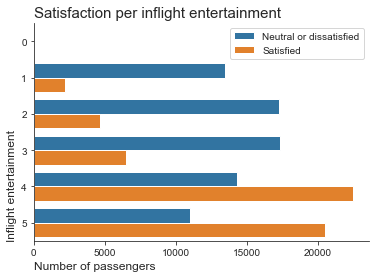

In [62]:
inflight_entertainment_satisfaction_plot = sns.countplot(y="inflight_entertainment", hue="satisfaction", data=df_final, 
                                                         orient="b")
inflight_entertainment_satisfaction_plot.set_title('Satisfaction per inflight entertainment', fontsize=15, loc='left' )
inflight_entertainment_satisfaction_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
inflight_entertainment_satisfaction_plot.set_ylabel('Inflight entertainment', fontsize=12, loc="bottom")
custom_legend_labels = ['Neutral or dissatisfied', 'Satisfied']
inflight_entertainment_satisfaction_plot.legend(custom_legend_labels)
sns.despine()

About **Inflight Entertainment**, we can see that in case of 4 and 5 stars most of the passengers are satisfied.

#### **Online Boarding**

##### **Onile Boarding and satisfaction** 

In [63]:
pd.crosstab(df_final["online_boarding"], df_final["satisfaction"], margins=True, normalize=True, margins_name="Total")

satisfaction,0,1,Total
online_boarding,,,
0,0.010325,0.013389,0.023714
1,0.088035,0.014067,0.102102
2,0.149538,0.019341,0.168879
3,0.180051,0.028734,0.208785
4,0.111657,0.184524,0.296181
5,0.025932,0.174407,0.200339
Total,0.565537,0.434463,1.000000


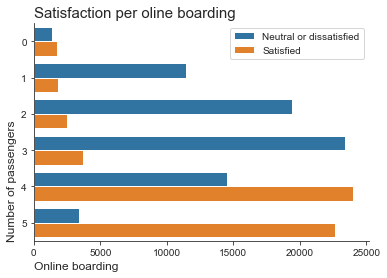

In [64]:
online_boarding_satisfaction_plot = sns.countplot(y="online_boarding", hue="satisfaction", data=df_final, orient="b")
online_boarding_satisfaction_plot.set_title('Satisfaction per oline boarding', fontsize=15, loc='left' )
online_boarding_satisfaction_plot.set_xlabel('Online boarding', fontsize=12, loc="left")
online_boarding_satisfaction_plot.set_ylabel('Number of passengers', fontsize=12, loc="bottom")
custom_legend_labels = ['Neutral or dissatisfied', 'Satisfied']
online_boarding_satisfaction_plot.legend(custom_legend_labels)
sns.despine()

About **Online boarding**, we have the same situation than Inflight Entertainment, in case of 4 and 5 stars most of the passengers are very satisfied. Both confirm the positive correlation.

#### **Seat Comfort**

##### **Seat comfort  and satisfaction** 

In [65]:
pd.crosstab(df_final["seat_comfort"], df_final["satisfaction"], margins=True, normalize=True, margins_name="Total")

satisfaction,0,1,Total
seat_comfort,,,
0,0.000008,0.000000,0.000008
1,0.090345,0.025978,0.116323
2,0.110417,0.032245,0.142662
3,0.141161,0.038451,0.179612
4,0.134593,0.171504,0.306098
5,0.089013,0.166284,0.255297
Total,0.565537,0.434463,1.000000


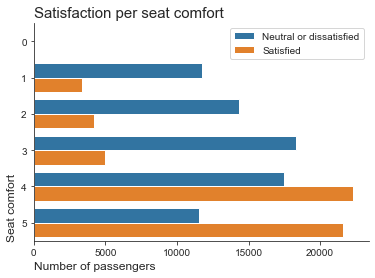

In [66]:
seat_comfort_satisfaction_plot = sns.countplot(y="seat_comfort", hue="satisfaction", data=df_final, 
                                                         orient="b")
seat_comfort_satisfaction_plot.set_title('Satisfaction per seat comfort', fontsize=15, loc='left' )
seat_comfort_satisfaction_plot.set_xlabel('Number of passengers', fontsize=12, loc="left")
seat_comfort_satisfaction_plot.set_ylabel('Seat comfort', fontsize=12, loc="bottom")
custom_legend_labels = ['Neutral or dissatisfied', 'Satisfied']
seat_comfort_satisfaction_plot.legend(custom_legend_labels)
sns.despine()

In Seat comfort, whe have most cases of Satisfied passengers in 4 and 5 stars, for the other scores the passengers would be most probable dissatisfied.

#### **Inflight wifi service**

##### **Inflight wifi service and satisfaction** 

In [67]:
pd.crosstab(df_final["inflight_wifi_service"], df_final["satisfaction"], margins=True, normalize=True,
            margins_name="Total")

satisfaction,0,1,Total
inflight_wifi_service,,,
0,0.000077,0.030074,0.030151
1,0.115491,0.056421,0.171913
2,0.187327,0.061518,0.248845
3,0.185402,0.062404,0.247806
4,0.076155,0.114598,0.190753
5,0.001086,0.109447,0.110533
Total,0.565537,0.434463,1.000000


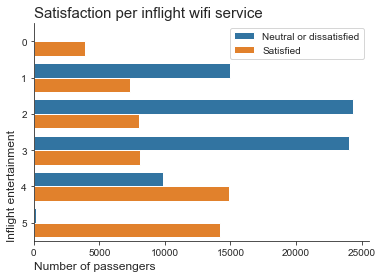

In [68]:
inflight_wifi_service_satisfaction_plot = sns.countplot(y="inflight_wifi_service", hue="satisfaction", data=df_final, 
                                                         orient="b")
inflight_wifi_service_satisfaction_plot.set_title('Satisfaction per inflight wifi service', fontsize = 15, loc='left' )
inflight_wifi_service_satisfaction_plot.set_xlabel('Number of passengers', fontsize = 12, loc="left")
inflight_wifi_service_satisfaction_plot.set_ylabel('Inflight entertainment', fontsize = 12, loc="bottom")
custom_legend_labels = ['Neutral or dissatisfied', 'Satisfied']
inflight_wifi_service_satisfaction_plot.legend(custom_legend_labels)
sns.despine()

In relation to Inflight wifi service, we have the same situation than inflight wifi service. We can see that in case of 4 and 5 stars most of the passengers are satisfied. We have many dissatified passengers in the other scores.

### **Multivariate Analysis**<a name="multi"></a>

### Class, Online boarding and Satisfaction

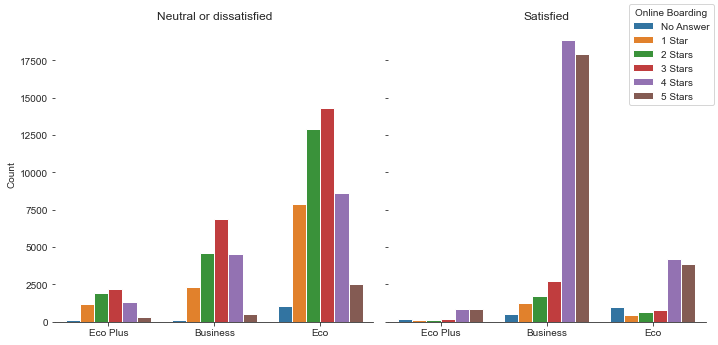

In [69]:
class_satisfaction_online_boarding_plot = sns.catplot(hue="online_boarding", x="class", col="satisfaction", 
                                                             data=df_final, kind="count", legend=False)
custom_legend_labels = ['No Answer', '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']

fig = plt.gcf()
fig.legend(custom_legend_labels, title="Online Boarding")

hue_titles = {0: 'Neutral or dissatisfied', 1: 'Satisfied'}
for ax, (hue_value, title) in zip(class_satisfaction_online_boarding_plot.axes.flat, hue_titles.items()):
    ax.set_title(title)
    
_ = (class_satisfaction_online_boarding_plot.set_axis_labels("", "Count")
  .despine(left=True)) 

Here we can see how the **Class** feature makes the difference. In **Business**, we have max values with 4 and 5 stars, and the passengers are satisfied.
**Eco class** has **Online Boarding** with 2 and 3 stars, and the passengers are not satisfied.

### Class, Type of travel and Satisfaction

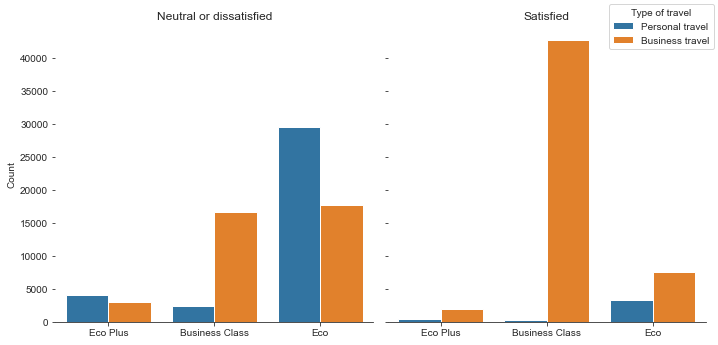

In [70]:
type_travel_class_satisfaction_plot = sns.catplot(hue="type_of_travel", x="class", col="satisfaction", 
                                                  data=df_final, kind="count", legend=False)

fig = plt.gcf()
custom_legend_labels = ['Personal travel', 'Business travel']
fig.legend(custom_legend_labels, title="Type of travel")

hue_titles = {0: 'Neutral or dissatisfied', 1: 'Satisfied'}
_ = (type_travel_class_satisfaction_plot.set_axis_labels("", "Count")
  .set_xticklabels(["Eco Plus", "Business Class", "Eco"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True)) 

for ax, (hue_value, title) in zip(type_travel_class_satisfaction_plot.axes.flat, hue_titles.items()):
    ax.set_title(title)

Here we can see that most of the passengers that travel for Business and in a Business Class are satisfied. However, the passengers that that do a Personal travel, most of them do it in Eco class, and are dissatisfied.

I will get a new dataframe with just these features.

In [71]:
df_filtered = df_final[["class", "type_of_travel", "online_boarding", "satisfaction"]]
df_filtered['satisfaction'].replace(1, 'satisfied', inplace=True)
df_filtered['satisfaction'].replace(0, 'neutral or dissatisfied', inplace=True)
df_filtered.head()

,class,type_of_travel,online_boarding,satisfaction
0,Eco Plus,Personal Travel,3,neutral or dissatisfied
1,Business,Business travel,3,neutral or dissatisfied
2,Business,Business travel,5,satisfied
3,Business,Business travel,2,neutral or dissatisfied
4,Business,Business travel,5,satisfied


I group in order to get the total of rows by satisfaction, class and travel type.

In [72]:
df_filtered_grouped = df_filtered.groupby(["class", "type_of_travel", 
                                           "satisfaction"]).count().reset_index().rename(columns={
    "online_boarding": "count"})

df_filtered_grouped.head()

,class,type_of_travel,satisfaction,count
0,Business,Business travel,neutral or dissatisfied,16634
1,Business,Business travel,satisfied,42853
2,Business,Personal Travel,neutral or dissatisfied,2360
3,Business,Personal Travel,satisfied,313
4,Eco,Business travel,neutral or dissatisfied,17726


I'll do an Alluvial graph in order to see how the features are related.

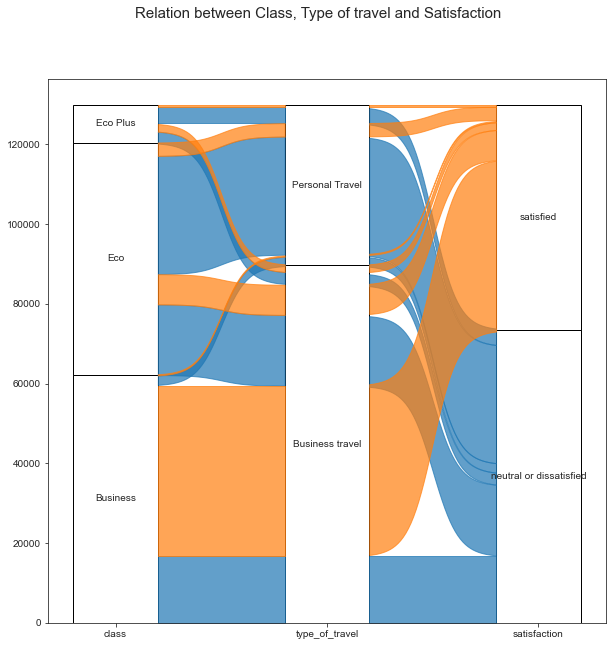

In [73]:
fig = alluvial.plot(df=df_filtered_grouped, xaxis_names=['class', 'type_of_travel', 'satisfaction'], 
                    y_name='count', alluvium='satisfaction')
fig.suptitle('Relation between Class, Type of travel and Satisfaction', fontsize=15)
fig.set_size_inches(10, 10)  
plt.show()

Here we can see that most of the satisfied passengers are from **Business class** and **Travel for business**. Meantime, the not satisfied passengers are from **Eco class** and **Personal travel**.  Also, most of the **Business travel** are passengers satisfied, and most of the **Personal travel** are dissatisfied.

In this way we can say that these 3 features (class, type_of_travel y online_boarding) are correlated to our target, and could be enough to predict the target.

----------------

As the class defines in big percentage the satisfaction of the passenger, let's see the reviews of the services when the passenger travels in Business class and is satisfied, and when the passenger tavels in Eco class and is dissatisfied.

In [74]:
df_business_satisfied = df_final[(df_final["satisfaction"] == 1) & (df_final["class"] == "Business")].mean()
df_business_satisfied = pd.DataFrame(df_business_satisfied, df_business_satisfied.index)
df_business_satisfied = df_business_satisfied.T
df_business_satisfied = df_business_satisfied[["inflight_wifi_service", "ease_of_online_booking", "gate_location", 
                                               "food_and_drink", "online_boarding", "seat_comfort", 
                                               "inflight_entertainment", "on_board_service", "leg_room_service", 
                                               "baggage_handling", "checkin_service", "inflight_service", "cleanliness", 
                                                "satisfaction"]]

In [75]:
df_eco_dissatisfied = df_final[(df_final["satisfaction"] == 0) & (df_final["class"] == "Eco")].mean()
df_eco_dissatisfied = pd.DataFrame(df_eco_dissatisfied, df_eco_dissatisfied.index)
df_eco_dissatisfied = df_eco_dissatisfied.T
df_eco_dissatisfied = df_eco_dissatisfied[["inflight_wifi_service", "ease_of_online_booking", "gate_location", 
                                           "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", 
                                           "on_board_service", "leg_room_service", "baggage_handling", 
                                           "checkin_service", "inflight_service", "cleanliness", "satisfaction"]]

In [76]:
df_results = pd.concat([df_business_satisfied, df_eco_dissatisfied], axis=0)
df_results.head()

,inflight_wifi_service,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,2.940532,2.980031,2.981536,3.522147,4.132118,4.099407,4.054974,4.026919,3.992865,4.127485,3.786267,4.129199,3.812260,1.0
0,2.397669,2.459021,2.977304,2.992104,2.614977,3.060233,2.975658,3.073238,3.041887,3.444686,3.101444,3.462083,3.015792,0.0


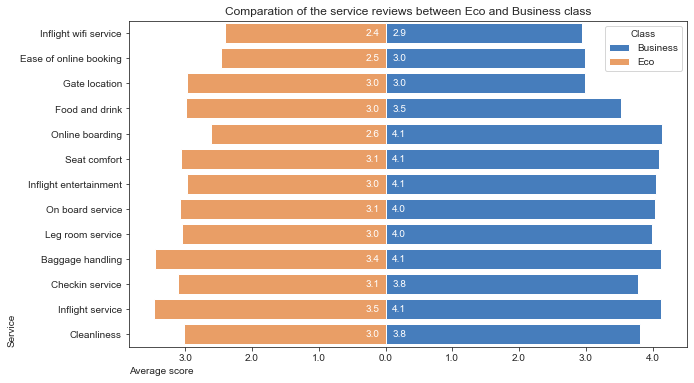

In [77]:
df_melted = df_results.melt(id_vars='satisfaction', var_name='Service', value_name='Average Score')

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
business_bars = sns.barplot(x='Average Score', y='Service', data=df_melted[df_melted['satisfaction'] == 1],
            color='#337CCF', label='Business', orient='horizontal', ci = None)

eco_bars = sns.barplot(x=-df_melted['Average Score'], y='Service', data=df_melted[df_melted['satisfaction'] == 0],
            color='#FF9B50', label='Eco', orient='horizontal',ci = None)

for bar, rating in zip(business_bars.patches, df_melted[df_melted['satisfaction'] == 1]['Average Score']):
    plt.text(bar.get_x() + 0.1, bar.get_y() + bar.get_height() / 2, f'{rating:.1f}',
             va='center', fontsize=10, color="white")
    
for bar, rating in zip(eco_bars.patches, df_melted[df_melted['satisfaction'] == 0]['Average Score']):
    plt.text(bar.get_x() - 0.3, bar.get_y() + bar.get_height() / 2, f'{rating:.1f}',
             va='center', fontsize=10, color="white")

def format_ticks(x, _):
    if x < 0:
        return f'{abs(x):.1f}'
    return f'{x:.1f}'

from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

y_labels = ['Inflight wifi service', 'Ease of online booking', 'Gate location', 'Food and drink', 'Online boarding',
                  'Seat comfort', 'Inflight entertainment', 'On board service', 'Leg room service', 'Baggage handling',
                  'Checkin service', 'Inflight service', 'Cleanliness']

plt.yticks(range(len(y_labels)), y_labels)
plt.xlabel('Average score', loc="left")
plt.ylabel('Service', loc="bottom")
plt.title('Comparation of the service reviews between Eco and Business class')

plt.legend(title='Class')
plt.show()

We can see the biggest difference is on Online boarding, where in Eco class we have 2.6, and in Business class we have 4.1.

# **Models**<a name="models"></a>

For the models and predictions, I will just these features:
* **Class**
* **Type of travel**
* **Inflight entertainment**
* **Online boarding**
* **Seat confort**
* **Inflight wifi service**

Before applying models, I will split the data set into train and test sets, I will applot one hot to the nominal categorical features, Class and Type of travel.

In [78]:
class ColumnDropperTransformer():
    """
    Class Transformer to remove the unnecessary columns
    """
    def __init__(self,columns):
        self.columns = columns

    def transform(self, data, y=None):
        return data.drop(self.columns,axis=1)

    def fit(self, data, y=None):
        return self
      
class Debug(BaseEstimator, TransformerMixin):
    """
    Debug Class, to print the status of the data through the different steps of the pipeline.
    """
    def transform(self, X):
        print(X.shape)
        #print(pd.DataFrame(X).describe())
        #what other output you want
        return X

    def fit(self, X, y=None, **fit_params):
        return self
    
nominal_categorical = ColumnTransformer(
    transformers=[
            ('one_hot_columns', OneHotEncoder(handle_unknown='ignore'), ['class','type_of_travel'])
], remainder='passthrough')

preprocessor_pipeline = Pipeline(steps=[
                                ('drop_colummns', ColumnDropperTransformer(['Unnamed: 0', 'id', 'gender', 'age',
                                                                   'flight_distance', 'inflight_service', 'customer_type',
                                                                   'departure_arrival_time_convenient', 'ease_of_online_booking',
                                                                   'gate_location', 'food_and_drink', 'online_boarding',
                                                                   'leg_room_service', 'baggage_handling', 'checkin_service',
                                                                   'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes'
                                                                   ])),
                                ('nominal_categorical', nominal_categorical),
                                #('debug8', Debug())
                            ])

In [79]:
X = df_final.copy()
y = X.pop("satisfaction")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

I have also some functions to plot the AUC, the confusion matrix and the calibration curve.

In [80]:
def plot_confusion_matrix(y_test, y_test_predicted, model_name):
    """ 
    Print the main metrics and plot the confusion matrix
    
    Parameters
    ----------
    y_test : array
        The actual values
    y_test_predicted : array
        The values predicted by the model
    model_name : str
        Name of the model
    """
    
    cm = metrics.confusion_matrix(y_test, y_test_predicted, normalize='true')
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = np.around(cm.flatten(),2)
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    matrix_conf_dtc=sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    matrix_conf_dtc.set_title('Confusion Matrix - ' + model_name, fontsize = 12, fontweight = 'bold' )
    matrix_conf_dtc.xaxis.set_ticklabels(['False','True'])
    matrix_conf_dtc.yaxis.set_ticklabels(['False','True'])
    matrix_conf_dtc.set_xlabel('\nPredicted Values')
    matrix_conf_dtc.set_ylabel('Actual Values ');
    report = metrics.classification_report(y_test, y_test_predicted, digits=3)
    print(report)
    
def plotAUC(model, x_test, y_test, y_test_pred):
    """ 
    Plot Area Under the Curve
    
    Parameters
    ----------
    model : piepline
        Model used to make predictions
    x_test : array
        Values to predict
    y_test : array
        Actual test values
    y_test_pred : pipeline
        Predicted test values
    """
    
    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, test_probs)
    auc_result = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label = 'AUC = %0.2f' % auc_result)
    plt.xlabel('Recall', loc="left")
    plt.ylabel('Precision', loc="bottom")
    plt.legend()
    plt.show()
    
def plot_calibration_curve(model, X_test, y_test):
    """ 
    Plot Calibration Curve
    
    Parameters
    ----------
    model : piepline
        Model used to make predictions
    x_test : array
        Values to predict
    y_test : array
        Actual test values
    """
    
    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:, 1]
    fop, mpv = calibration_curve(y_test, test_probs, n_bins=10)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(mpv, fop, marker='.')
    plt.show()

For this problem, I take care of the true positives, becuase we want that the passengers that we expected to be satisfied are really satisfied, so I will the precision in order to compare the different models.

### **Decision Tree**<a name="dt"></a>

Let's start using Decision Tree. Then we'll use GridSearchCV to optimize the hype parameters.

In [95]:
pipeline_dtc_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', DecisionTreeClassifier(random_state=42))])
pipeline_dtc_default.fit(X_train, y_train)
X_train_dtc_predicted_default = pipeline_dtc_default.predict(X_train)
metrics.precision_score(y_train, X_train_dtc_predicted_default)

0.9095635932254726

In [96]:
X_test_dtc_predicted_default = pipeline_dtc_default.predict(X_test)
metrics.precision_score(y_test, X_test_dtc_predicted_default)

0.9067201604814443

              precision    recall  f1-score   support

           0      0.927     0.928     0.927     21979
           1      0.907     0.905     0.906     16985

    accuracy                          0.918     38964
   macro avg      0.917     0.916     0.917     38964
weighted avg      0.918     0.918     0.918     38964



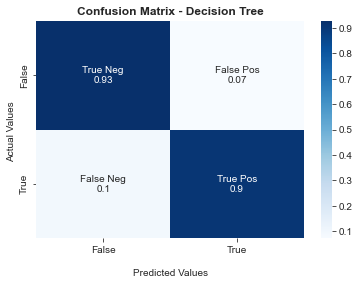

In [97]:
plot_confusion_matrix(y_test, X_test_dtc_predicted_default, "Decision Tree")

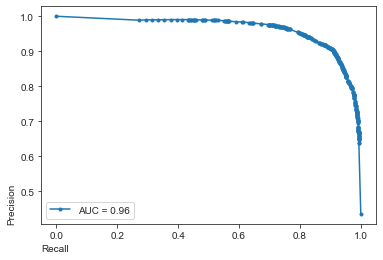

In [409]:
plotAUC(pipeline_dtc_default, X_test, y_test, X_test_dtc_predicted_default)

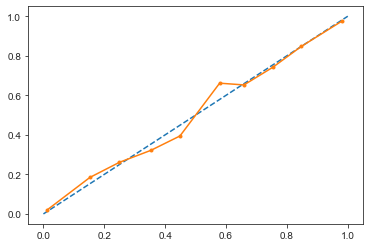

In [426]:
plot_calibration_curve(pipeline_dtc_default, X_test, y_test)

With the default parameters we get a precision of 0.90%, with low percentage los false positives and 0.96 of AUC. Let's see if we can improve by tuning the hyperparameters.

In [387]:
pipeline_dtc = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42))])
dtc_param = {'DecisionTreeClassifier__criterion': ['entropy', 'gini'], 
              'DecisionTreeClassifier__min_samples_split': np.arange(3, 10),
              'DecisionTreeClassifier__max_depth': np.arange(3, 10),
              'DecisionTreeClassifier__min_samples_leaf': np.arange(2, 10)}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
dtc_search = GridSearchCV(pipeline_dtc, dtc_param, cv=cv, scoring='precision')

In [388]:
search = dtc_search.fit(X_train, y_train)
print(dtc_search.best_params_)

{'DecisionTreeClassifier__criterion': 'entropy', 'DecisionTreeClassifier__max_depth': 9, 'DecisionTreeClassifier__min_samples_leaf': 4, 'DecisionTreeClassifier__min_samples_split': 3}


In [389]:
search.best_score_

0.9029412274733399

In [391]:
pipeline_dtc_tunning = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('DecisionTreeClassifier', DecisionTreeClassifier(criterion='entropy', min_samples_split=3, 
                                                                                min_samples_leaf=4, max_depth=9))])
pipeline_dtc_tunning.fit(X_train, y_train)
X_train_dtc_tunning_predicted = pipeline_dtc_tunning.predict(X_train)
metrics.precision_score(y_train, X_train_dtc_tunning_predicted)

0.9023214736310876

In [392]:
y_test_dtc_tunning_predicted = pipeline_dtc_tunning.predict(X_test)
metrics.precision_score(y_test, y_test_dtc_tunning_predicted)

0.9012847713342763

With hyper parameters we get a precision of 0.90

              precision    recall  f1-score   support

           0      0.923     0.924     0.923     21979
           1      0.901     0.900     0.901     16985

    accuracy                          0.914     38964
   macro avg      0.912     0.912     0.912     38964
weighted avg      0.914     0.914     0.914     38964



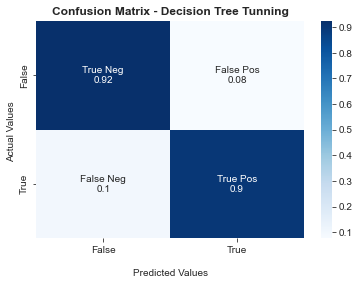

In [413]:
plot_confusion_matrix(y_test, y_test_dtc_tunning_predicted, "Decision Tree Tunning")

As our target is imbalanced, let's see and compare the Precision-Recall Curve and AUC.

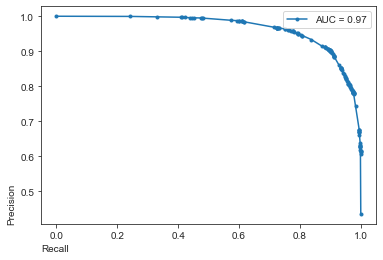

In [427]:
plotAUC(pipeline_dtc_tunning, X_test, y_test, y_test_dtc_tunning_predicted)

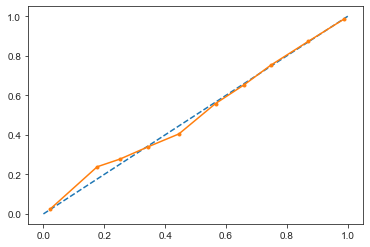

In [428]:
plot_calibration_curve(pipeline_dtc_tunning, X_test, y_test)

We get very similar results by tunning the hyperparameters, both have skill, but this one has higher value of AUC, and it is more calibrated.

### **Logistic Regression**<a name="lr"></a>

In [429]:
pipeline_lr_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('LogisticRegression', LogisticRegression())])
pipeline_lr_default.fit(X_train, y_train)
X_train_lr_predicted = pipeline_lr_default.predict(X_train)
metrics.precision_score(y_train, X_train_lr_predicted)

0.8061623653728917

In [430]:
X_test_lr_predicted = pipeline_lr_default.predict(X_test)
metrics.precision_score(y_test, X_test_lr_predicted)

0.8050547896783316

              precision    recall  f1-score   support

           0      0.849     0.849     0.849     21979
           1      0.805     0.805     0.805     16985

    accuracy                          0.830     38964
   macro avg      0.827     0.827     0.827     38964
weighted avg      0.830     0.830     0.830     38964



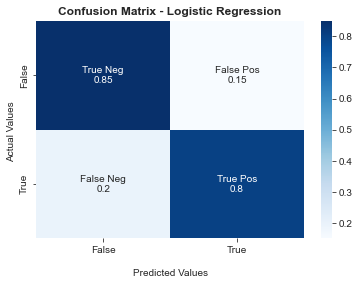

In [431]:
plot_confusion_matrix(y_test, X_test_lr_predicted, "Logistic Regression")

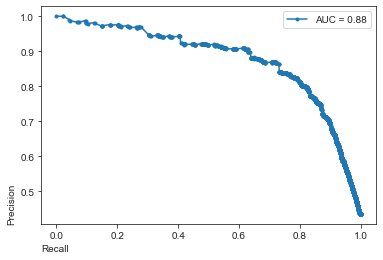

In [432]:
plotAUC(pipeline_lr_default, X_test, y_test, X_test_lr_predicted)

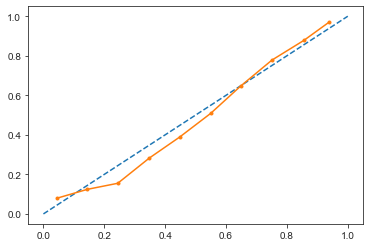

In [433]:
plot_calibration_curve(pipeline_lr_default, X_test, y_test)

With default values of Logistic Regression, we get a precision of 0.80, a lower than Decision Tree and also a less calibrated. About the false positives, it has more.

Let's see using hyper parameters.

In [434]:
pipeline_lr_tuning = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('LogisticRegression', LogisticRegression())])
lr_param = {'LogisticRegression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
            'LogisticRegression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'LogisticRegression__class_weight': [None, 'balanced'],
            'LogisticRegression__l1_ratio': [0, 0.3, 0.5, 0.7, 1],
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
lr_search = GridSearchCV(pipeline_lr_tuning, lr_param, cv=cv, scoring='precision')

In [435]:
search = lr_search.fit(X_train, y_train)
print(search.best_params_)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packa

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sa

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\li

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anac

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packa

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)

C:\Users\ouw-Alejandro.Sandle\

{'LogisticRegression__class_weight': None, 'LogisticRegression__l1_ratio': 0, 'LogisticRegression__penalty': 'none', 'LogisticRegression__solver': 'sag'}


In [436]:
print(search.best_params_)

{'LogisticRegression__class_weight': None, 'LogisticRegression__l1_ratio': 0, 'LogisticRegression__penalty': 'none', 'LogisticRegression__solver': 'sag'}


In [437]:
search.best_score_

0.8054078607362266

In [78]:
pipeline_lr_tuning = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('LogisticRegression', LogisticRegression(class_weight=None, l1_ratio=0, 
                                                                        penalty='none', solver='sag'))])
pipeline_lr_tuning.fit(X_train, y_train)
X_train_lr_tunning_predicted = pipeline_lr_tuning.predict(X_train)
metrics.precision_score(y_train, X_train_lr_tunning_predicted)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)



0.8061729963165248

In [80]:
X_test_lr_tunning_predicted = pipeline_lr_tuning.predict(X_test)
metrics.precision_score(y_test, X_test_lr_tunning_predicted)

0.8050547896783316

              precision    recall  f1-score   support

           0      0.849     0.849     0.849     21979
           1      0.805     0.805     0.805     16985

    accuracy                          0.830     38964
   macro avg      0.827     0.827     0.827     38964
weighted avg      0.830     0.830     0.830     38964



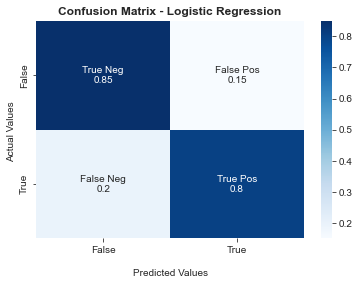

In [85]:
plot_confusion_matrix(y_test, X_test_lr_tunning_predicted, "Logistic Regression")

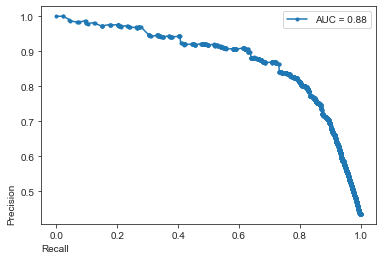

In [88]:
plotAUC(pipeline_lr_tuning, X_test, y_test, X_test_lr_tunning_predicted)

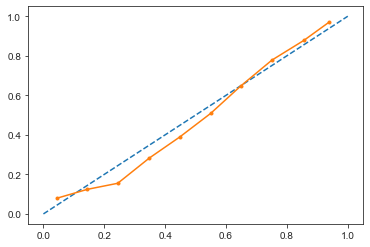

In [87]:
plot_calibration_curve(pipeline_lr_tuning, X_test, y_test)

The tuning model gives similar predictions than the previous one.

If we compared with Decision Tree, Logistic regression has more False positives, and less True positives. Moreover, the Decision Tree has more AUC with 0.97, and is more calibrated.

### **K Neighbors**<a name="kn"></a>

Let's try now with K Neighbors.

In [93]:
pipeline_kn_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('KNeighborsClassifier', KNeighborsClassifier())])
pipeline_kn_default.fit(X_train, y_train)
X_train_kn_default_predicted = pipeline_kn_default.predict(X_train)
metrics.precision_score(y_train, X_train_kn_default_predicted)

0.8976632589192572

In [94]:
X_test_kn_default_predicted = pipeline_kn_default.predict(X_test)
metrics.precision_score(y_test, X_test_kn_default_predicted)

0.8929221804054874

              precision    recall  f1-score   support

           0      0.899     0.920     0.909     21979
           1      0.893     0.866     0.879     16985

    accuracy                          0.896     38964
   macro avg      0.896     0.893     0.894     38964
weighted avg      0.896     0.896     0.896     38964



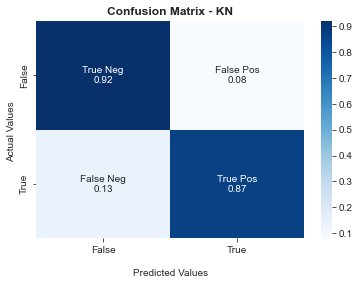

In [96]:
plot_confusion_matrix(y_test, X_test_kn_default_predicted, "KN")

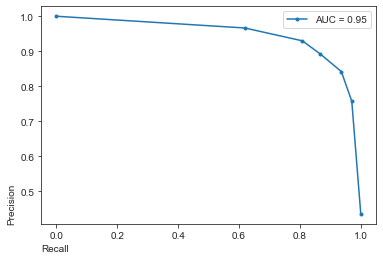

In [97]:
plotAUC(pipeline_kn_default, X_test, y_test, X_test_kn_default_predicted)

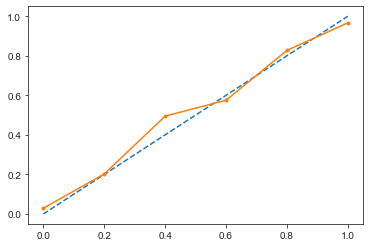

In [98]:
plot_calibration_curve(pipeline_kn_default, X_test, y_test)

We get 0.89 of precision, a bit lower than Decision Tree and also lower True positives, let's see if we can improve it by tuning the hyperparameters,

In [443]:
pipeline_kn_tuning = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('KNeighborsClassifier', KNeighborsClassifier())])

kn_param = {'KNeighborsClassifier__n_neighbors': np.arange(2, 11), 
            'KNeighborsClassifier__weights': ['uniform', 'distance'],
            'KNeighborsClassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
kn_search = GridSearchCV(pipeline_kn_tuning, kn_param, cv=cv, scoring='precision')

In [444]:
search = kn_search.fit(X_train, y_train)
print(search.best_params_)

{'KNeighborsClassifier__algorithm': 'brute', 'KNeighborsClassifier__n_neighbors': 2, 'KNeighborsClassifier__weights': 'uniform'}


In [446]:
search.best_score_

0.9179323608359804

In [90]:
pipeline_kn_tuning = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=2, weights='uniform', 
                                                                          algorithm='brute'))])
pipeline_kn_tuning.fit(X_train, y_train)
X_train_kn_tunning_predicted = pipeline_kn_tuning.predict(X_train)
metrics.precision_score(y_train, X_train_kn_tunning_predicted)

0.9232757795295695

In [91]:
X_test_kn_tunning_predicted = pipeline_kn_tuning.predict(X_test)
metrics.precision_score(y_test, X_test_kn_tunning_predicted)

0.9207389749702026

              precision    recall  f1-score   support

           0      0.819     0.952     0.880     21979
           1      0.921     0.728     0.813     16985

    accuracy                          0.854     38964
   macro avg      0.870     0.840     0.847     38964
weighted avg      0.863     0.854     0.851     38964



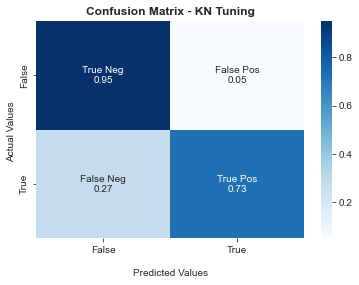

In [99]:
plot_confusion_matrix(y_test, X_test_kn_tunning_predicted, "KN Tuning")

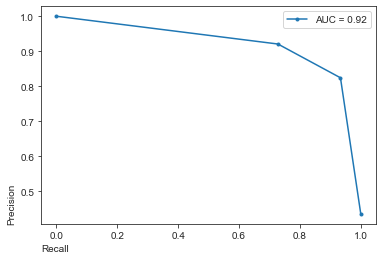

In [101]:
plotAUC(pipeline_kn_tuning, X_test, y_test, X_test_kn_tunning_predicted)

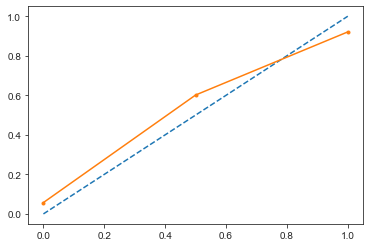

In [102]:
plot_calibration_curve(pipeline_kn_tuning, X_test, y_test)

Comparing with the model with the default values, by tuning we get a better precision with 0.92 and lower false positives, but this has lower true positives with 0.73, the lowest walue so far.

Considering the precision, confusion matrix and execution time, the best model is Decision Tree so far.

### **Random Forest**<a name="randmForest"></a>

In [103]:
pipeline_rf_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('RandomForestClassifier', RandomForestClassifier())])
pipeline_rf_default.fit(X_train, y_train)
X_train_rf_default_predicted = pipeline_rf_default.predict(X_train)
metrics.precision_score(y_train, X_train_rf_default_predicted)

0.9086741889985895

In [104]:
X_test_rf_default_predicted = pipeline_rf_default.predict(X_test)
metrics.precision_score(y_test, X_test_rf_default_predicted)

0.9053950697181855

              precision    recall  f1-score   support

           0      0.927     0.927     0.927     21979
           1      0.905     0.906     0.906     16985

    accuracy                          0.918     38964
   macro avg      0.916     0.916     0.916     38964
weighted avg      0.918     0.918     0.918     38964



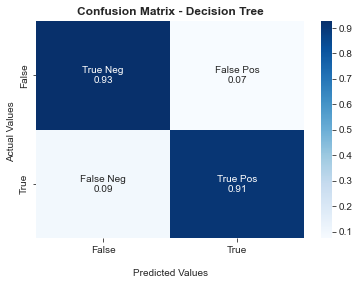

In [105]:
plot_confusion_matrix(y_test, X_test_rf_default_predicted, "Decision Tree")

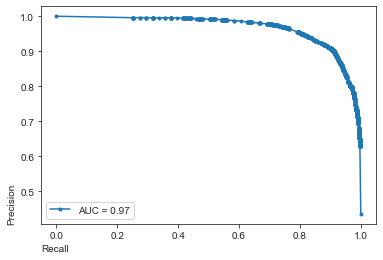

In [106]:
plotAUC(pipeline_rf_default, X_test, y_test, X_test_rf_default_predicted)

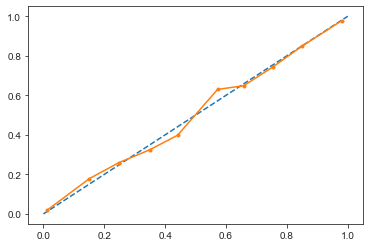

In [107]:
plot_calibration_curve(pipeline_rf_default, X_test, y_test)

With Random forest, we get a bit more true positives than Decision tree, and less false positives.

Let's see if we tuning the hyperparameters.

In [453]:
pipeline_rf_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('RandomForestClassifier', RandomForestClassifier())])

rdc_param = {'RandomForestClassifier__max_depth': np.arange(3, 8), 
            'RandomForestClassifier__min_samples_split': np.arange(6, 10),
            'RandomForestClassifier__min_samples_leaf': np.arange(6, 10),
            'RandomForestClassifier__n_estimators': [50, 100, 200, 300]
            }
rdc_search = GridSearchCV(pipeline_rf_default, rdc_param, cv=2, scoring='precision')

In [454]:
search = rdc_search.fit(X_train, y_train)
print(search.best_params_)

{'RandomForestClassifier__max_depth': 7, 'RandomForestClassifier__min_samples_leaf': 9, 'RandomForestClassifier__min_samples_split': 8, 'RandomForestClassifier__n_estimators': 100}


In [110]:
pipeline_rf_tuning = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('RandomForestClassifier', RandomForestClassifier(max_depth=7, min_samples_leaf=9, 
                                                                               min_samples_split=8, n_estimators=100))])
pipeline_rf_tuning.fit(X_train, y_train)
X_train_rf_tuning_predicted = pipeline_rf_tuning.predict(X_train)
metrics.precision_score(y_train, X_train_rf_tuning_predicted)

0.890981763677242

In [112]:
X_test_rf_tuning_predicted = pipeline_rf_tuning.predict(X_test)
metrics.precision_score(y_test, X_test_rf_tuning_predicted)

0.8888177798464044

              precision    recall  f1-score   support

           0      0.922     0.913     0.917     21979
           1      0.889     0.899     0.894     16985

    accuracy                          0.907     38964
   macro avg      0.905     0.906     0.906     38964
weighted avg      0.907     0.907     0.907     38964



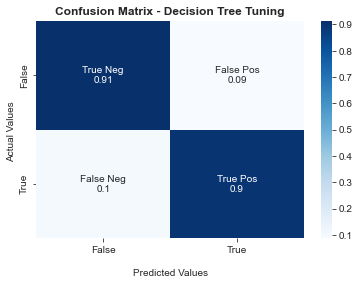

In [113]:
plot_confusion_matrix(y_test, X_test_rf_tuning_predicted, "Decision Tree Tuning")

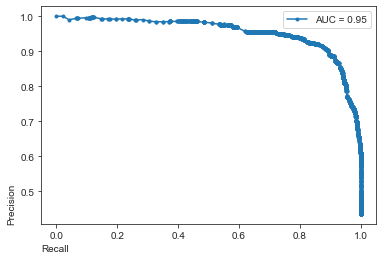

In [114]:
plotAUC(pipeline_rf_tuning, X_test, y_test, X_test_rf_tuning_predicted)

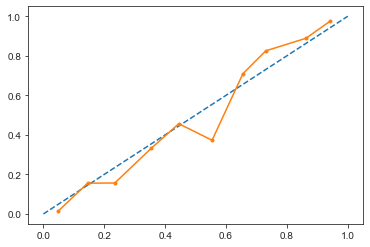

In [115]:
plot_calibration_curve(pipeline_rf_tuning, X_test, y_test)

By tuning the hyperparameters, the model ends with a worse behavior with less precisioon and more false positives. The calibration also of the tuning model is much worse.

### **Ensemble Models**<a name="ensemble"></a>

A part of Random Forest, lest user some other exemble models.

Let's start with AdaBoostClassifier

In [133]:
pipeline_abc_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('AdaBoostClassifier', AdaBoostClassifier(n_estimators=100, 
                                                    base_estimator=DecisionTreeClassifier(criterion='entropy', min_samples_split=3, 
                                                                                min_samples_leaf=4, max_depth=9), learning_rate=1))])
pipeline_abc_default.fit(X_train, y_train)
X_train_abc_default_predicted = pipeline_abc_default.predict(X_train)
metrics.precision_score(y_train, X_train_abc_default_predicted)

0.9083039758429794

In [134]:
X_test_abc_default_predicted = pipeline_abc_default.predict(X_test)
metrics.precision_score(y_test, X_test_abc_default_predicted)

0.905257586450247

              precision    recall  f1-score   support

           0      0.928     0.927     0.927     21979
           1      0.905     0.906     0.906     16985

    accuracy                          0.918     38964
   macro avg      0.916     0.916     0.916     38964
weighted avg      0.918     0.918     0.918     38964



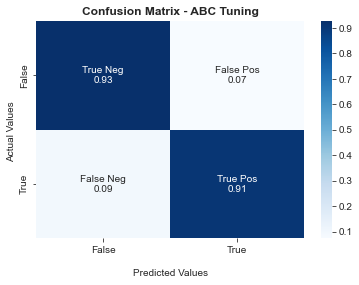

In [135]:
plot_confusion_matrix(y_test, X_test_abc_default_predicted, "ABC Tuning")

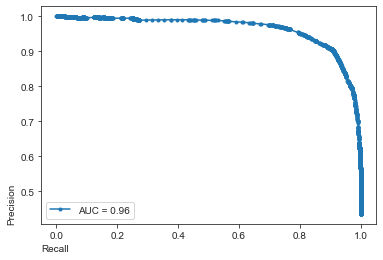

In [136]:
plotAUC(pipeline_abc_default, X_test, y_test, X_test_abc_default_predicted)

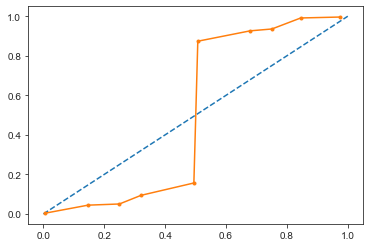

In [137]:
plot_calibration_curve(pipeline_abc_default, X_test, y_test)

Using an esemble model like AdaBoost with the decision tree, we don't get better results with high difference. The calibration plot looks much worse.

Let's try using another esemble model.

Let's see with Voting. In this I use KNeighbors, where we get the lowest number of false positives, and Decision Tree, that has the highest AUC and good true positives rate.

In [98]:
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=3, 
                                    min_samples_leaf=4, max_depth=9)

pipeline_vt_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('VotingClassifier', VotingClassifier(estimators=[('kn', kn), ('dt', dt)], voting='soft'))])
pipeline_vt_default.fit(X_train, y_train)
X_train_vt_default_predicted = pipeline_vt_default.predict(X_train)
metrics.precision_score(y_train, X_train_vt_default_predicted)

0.9014902943018159

In [99]:
X_test_vt_default_predicted = pipeline_vt_default.predict(X_test)
metrics.precision_score(y_test, X_test_vt_default_predicted)

0.9003746195270429

              precision    recall  f1-score   support

           0      0.927     0.923     0.925     21979
           1      0.900     0.906     0.903     16985

    accuracy                          0.915     38964
   macro avg      0.914     0.914     0.914     38964
weighted avg      0.915     0.915     0.915     38964



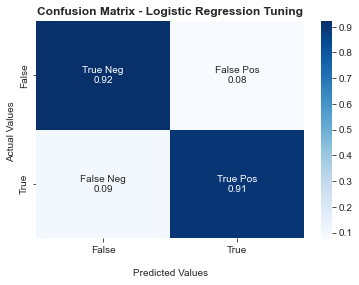

In [100]:
plot_confusion_matrix(y_test, X_test_vt_default_predicted, "Logistic Regression Tuning")

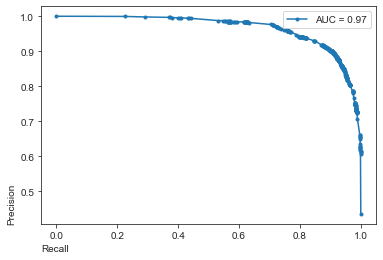

In [102]:
plotAUC(pipeline_vt_default, X_test, y_test, X_test_vt_default_predicted)

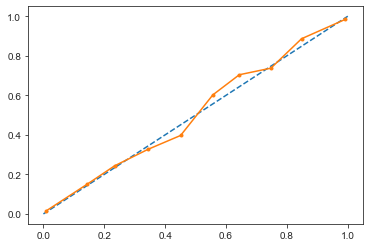

In [101]:
plot_calibration_curve(pipeline_vt_default, X_test, y_test)

In this case also, we don't get a model with much better behavior.

### Summary <a name="summary"></a>

The model with more skill is Decision Tree, it has a good precision of 90, and also good ratios of true positives and false positives.

We have tried with different models, all resulting with semiliar behavior, it seems that with these features is the maximum that we can get. A next step could be add other features in order the improve the models performance.

# **Conclusion**<a name="conclusion"></a>

After all the analysis, I can say that with the features that I selected (Class, Type of travel, Inflight entertainment Online boarding,Seat confort, Inflight wifi service) are a good start to predict the passengers satisfaction with a precision of 90%.

We have seen that most of the passengers are loyal, and that most of them travel in Eco and Business class. Also, most of the passengers travel for business.

The company has good score in Inflight service, Baggage handling and Seat comfort.

We have noticed also a big difference of satisfaction between Eco and Bussiness, mainly in Online Onboarding.

Due to that, I suggest to business team to check the Online Onboarding service, and try to solve the difference the both classes.